## Fitting carbonate and SO$_2$ peaks
- This notebook shows how to fit secondary peaks, such as carbonate and S-rich phases in vapour bubbles and fluid inclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from tqdm import tqdm
pf.__version__

'0.0.43'

In [2]:
# This specifies what file type your Raman exported in. 
filetype='HORIBA_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

In [3]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder 
spectra_path=DayFolder 

In [4]:
file_ext='.txt'
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spec']
Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, exclude_str=exclude_str)
print(Diad_Files)

['g15-mi1_01.txt', 'g15-mi1_02.txt', 'g15-mi1incl_01.txt', 'g36-mi1_01.txt', 'g36-mi1_02.txt', 'g36-mi1_03.txt', 'g36-mi1_04.txt', 'g36-mi1_05.txt', 'g36-mi1_06.txt', 'g45-mi1bub1_01.txt', 'g45-mi1bub1_02.txt', 'g45-mi1bub1_03.txt', 'g45-mi1bub1_04.txt', 'g45-mi1bub1_05.txt', 'g45-mi1bub2_01.txt', 'g45-mi1bub2_02.txt', 'g45-mi1bub2_03.txt', 'g45-mi1bub2_04.txt', 'g45-mi1bub2_05.txt', 'g45-mi2_01.txt', 'g45-mi2_02.txt', 'g45-mi2_03.txt', 'g45-mi2_04.txt', 'g45-mi2_05.txt', 'g47-mi1-bub1_01.txt', 'g47-mi1-bub1_02.txt', 'g47-mi1-bub1_03.txt', 'g47-mi1-bub1_04.txt', 'g47-mi1-bub1_05.txt', 'g47-mi1-bub2_01.txt', 'g47-mi1-bub2_02.txt', 'g47-mi1-bub2_03.txt']


## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


### Two options to ID peaks 
- the first is to use the sigma parameter, it finds the max position, and then within +-10 of that, finds the median, if the peak is sigma*the standard deviation above that it uses it 

g15-mi1_01.txt
g15-mi1_01.txt
g15-mi1_02.txt
g15-mi1incl_01.txt
g36-mi1_01.txt
g36-mi1_02.txt
g36-mi1_03.txt
g36-mi1_04.txt
g36-mi1_05.txt
g36-mi1_06.txt
g45-mi1bub1_01.txt
g45-mi1bub1_02.txt
g45-mi1bub1_03.txt
g45-mi1bub1_04.txt
g45-mi1bub1_05.txt
g45-mi1bub2_01.txt
g45-mi1bub2_02.txt
g45-mi1bub2_03.txt
g45-mi1bub2_04.txt
g45-mi1bub2_05.txt
g45-mi2_01.txt
g45-mi2_02.txt
g45-mi2_03.txt
g45-mi2_04.txt
g45-mi2_05.txt
g47-mi1-bub1_01.txt
g47-mi1-bub1_02.txt
g47-mi1-bub1_03.txt
g47-mi1-bub1_04.txt
g47-mi1-bub1_05.txt
g47-mi1-bub2_01.txt
g47-mi1-bub2_02.txt
g47-mi1-bub2_03.txt


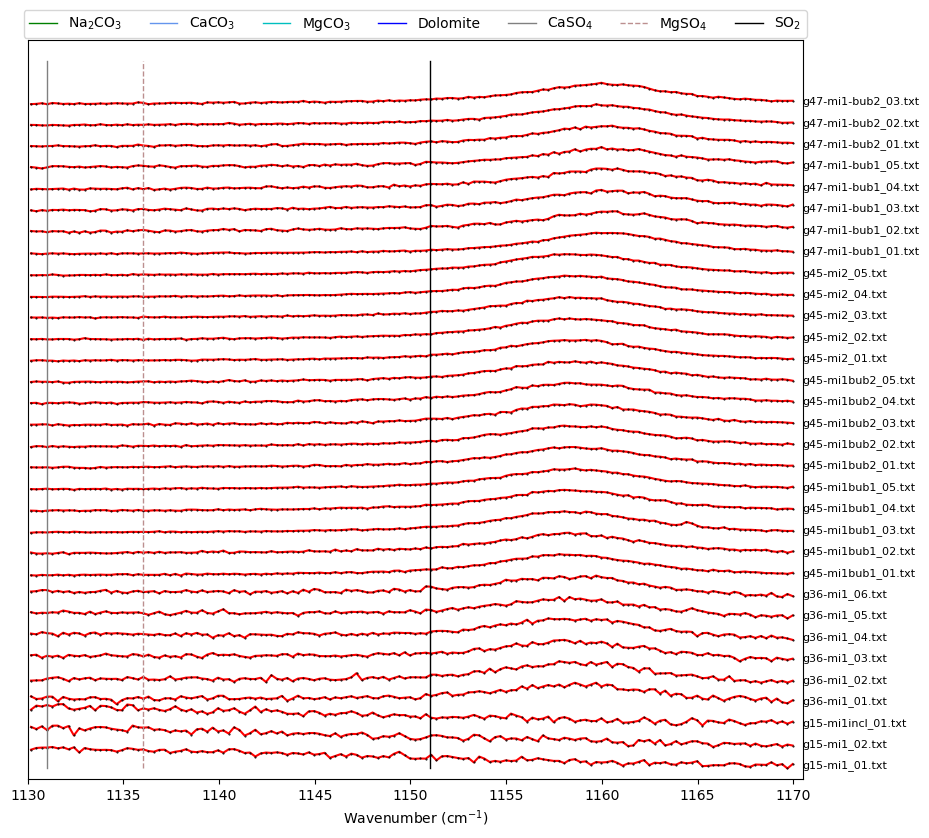

In [5]:
SO2_peaks_sigma, x_data_sigma, y_data_sigma, fig_sigma=pf.plot_secondary_peaks(Diad_Files=Diad_Files, 
            path=spectra_path, 
            filetype=filetype,  sigma_filter=True, sigma=3, 
      xlim=[1130, 1170], yscale=0.3)
fig_sigma.savefig('SO2_Peaks.png', dpi=300)

- Alternatively, you can use scipy find peaks, with the same peak parameters as used throughout Diad Fit

generic_peak_config(name='generic', lower_bck=(1060, 1065), upper_bck=(1120, 1130), x_range_bck=10, N_poly_carb_bck=1, amplitude=1000, cent_generic=1090, outlier_sigma=12, N_peaks=1, distance=10, prominence=30, width=1, threshold=1, height=10, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)
g15-mi1_01.txt
g15-mi1_01.txt
g15-mi1_02.txt
g15-mi1incl_01.txt
g36-mi1_01.txt
g36-mi1_02.txt
g36-mi1_03.txt
g36-mi1_04.txt
g36-mi1_05.txt
g36-mi1_06.txt
g45-mi1bub1_01.txt
g45-mi1bub1_02.txt
g45-mi1bub1_03.txt
g45-mi1bub1_04.txt
g45-mi1bub1_05.txt
g45-mi1bub2_01.txt
g45-mi1bub2_02.txt
g45-mi1bub2_03.txt
g45-mi1bub2_04.txt
g45-mi1bub2_05.txt
g45-mi2_01.txt
g45-mi2_02.txt
g45-mi2_03.txt
g45-mi2_04.txt
g45-mi2_05.txt
g47-mi1-bub1_01.txt
g47-mi1-bub1_02.txt
g47-mi1-bub1_03.txt
g47-mi1-bub1_04.txt
g47-mi1-bub1_05.txt
g47-mi1-bub2_01.txt
g47-mi1-bub2_02.txt
g47-mi1-bub2_03.txt


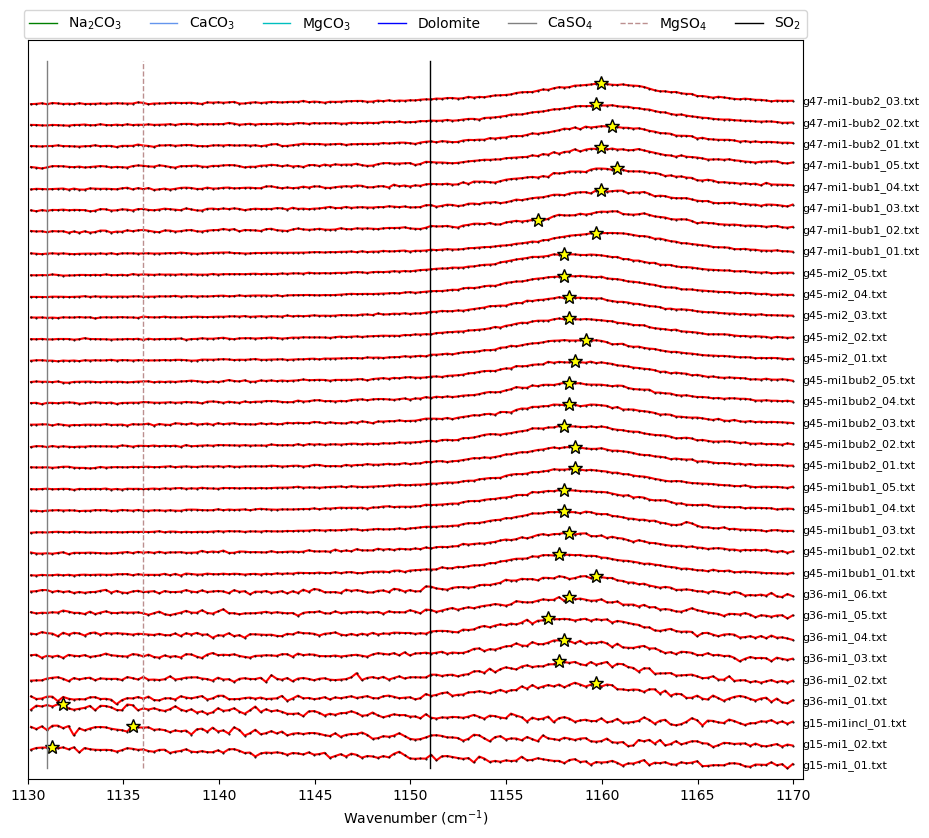

In [6]:
config_sec_SO2_scipy=pf.generic_peak_config(N_peaks=1, 
            prominence=30, height=10,
            width=1, threshold=1)
print(config_sec_SO2_scipy)

SO2_peaks_scipy, x_data_scipy, y_data_scipy, fig_scipy=pf.plot_secondary_peaks(
Diad_Files=Diad_Files,path=spectra_path, 
filetype=filetype, config=config_sec_SO2_scipy, find_peaks_filter=True,  
xlim=[1130, 1170], yscale=0.3)


### Now lets do an approximate peak fit for SO$_2$
- As always, set up for 1 file to get background, then loop through others

In [8]:
File_df=pd.DataFrame(data={'filename': Diad_Files})
# Choose whether to use scipy or sigma here
SO2_peaks=SO2_peaks_scipy
filenames_SO2=list(File_df['filename'].loc[(
    (SO2_peaks['pos'].between(1145, 1155))
    &
    (SO2_peaks['prom']>10)
    )])
filename=filenames_SO2[0]

IndexError: list index out of range

In [9]:
SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
upper_bck=[1160, 1180], cent_generic=1150, x_range_bck=5)
print(SO2_peak_config)

SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=True)

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1160, 1180], x_range_bck=5, N_poly_carb_bck=1, amplitude=1000, cent_generic=1150, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)


NameError: name 'filename' is not defined

## Now lets loop through files

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.03it/s]


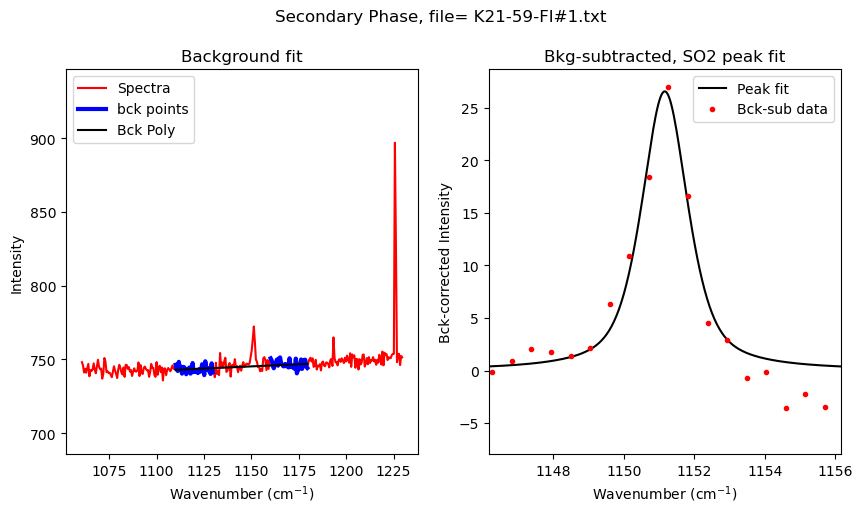

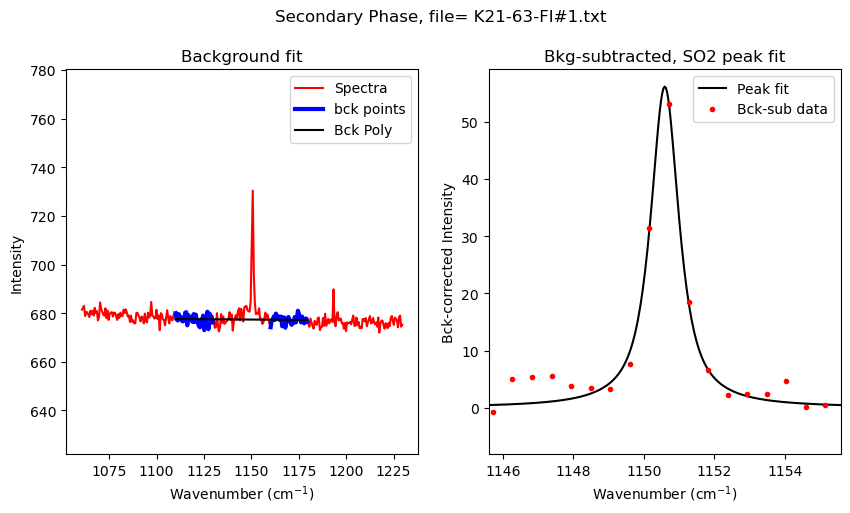

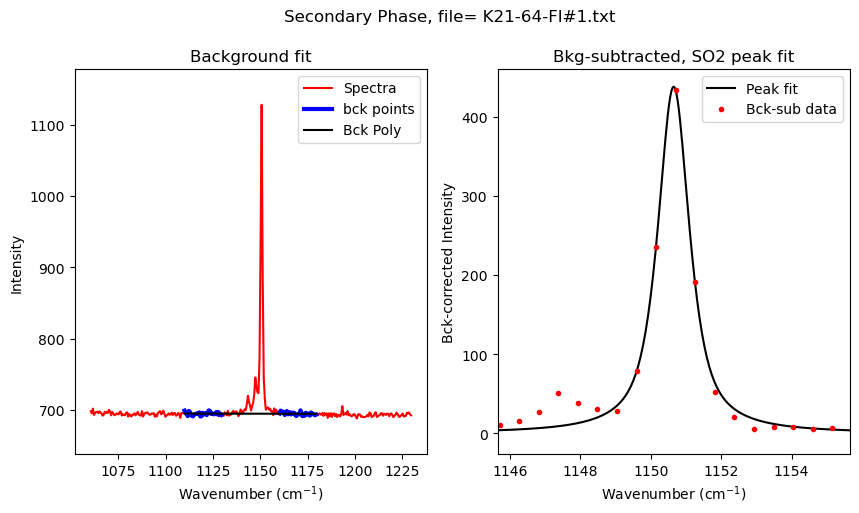

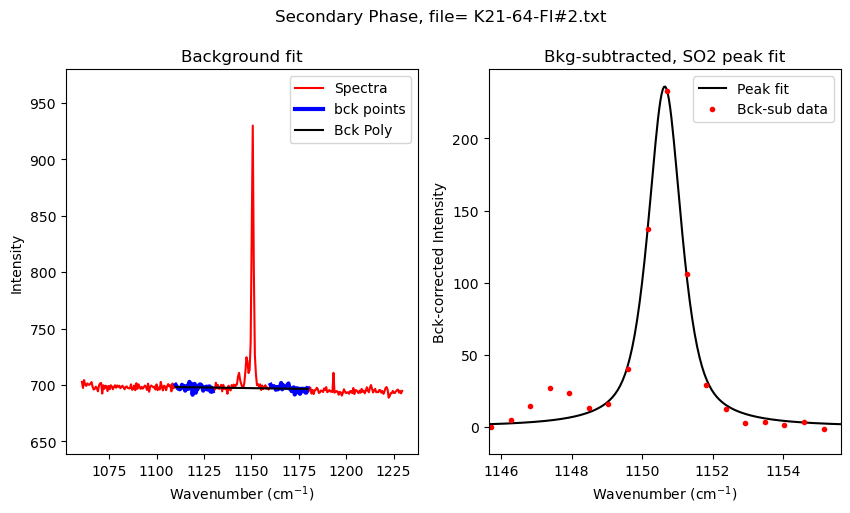

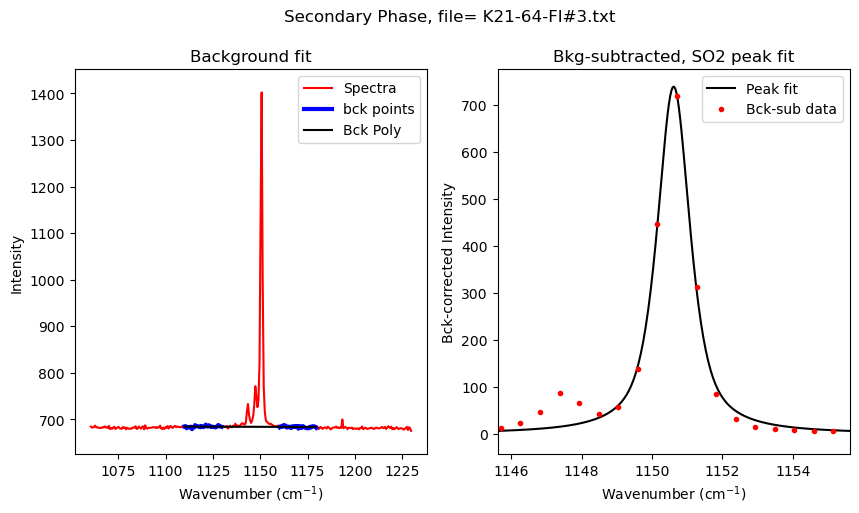

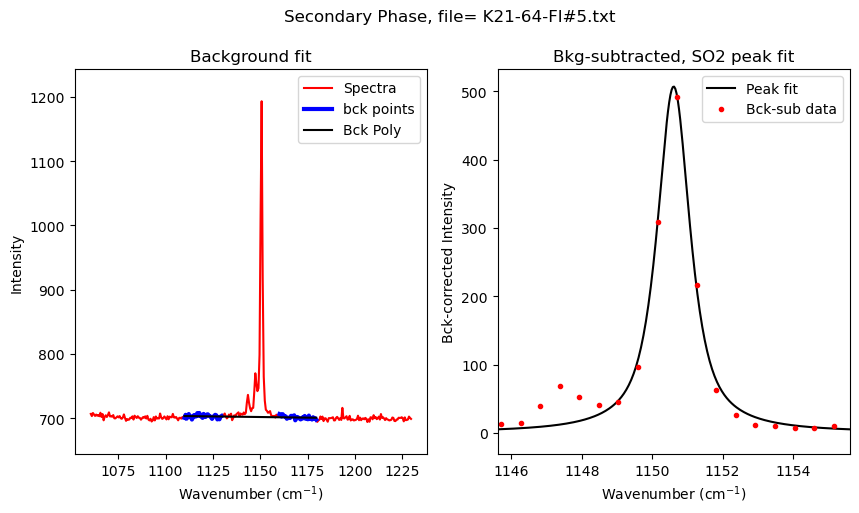

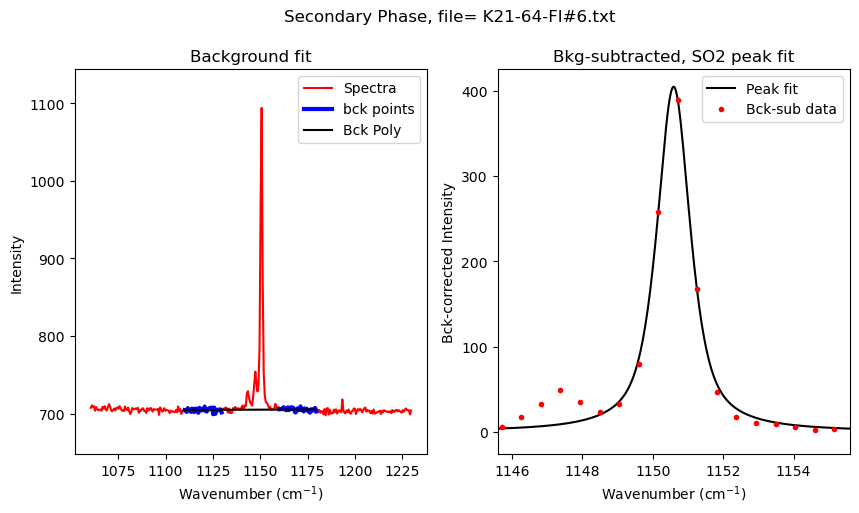

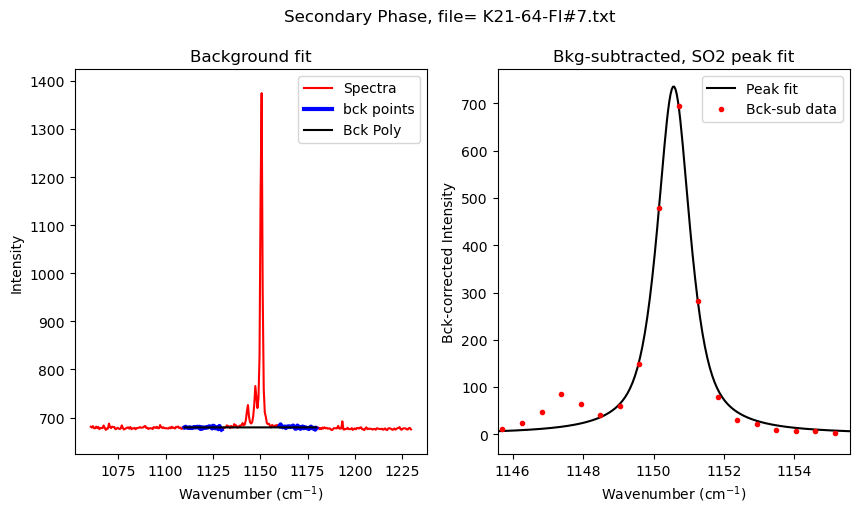

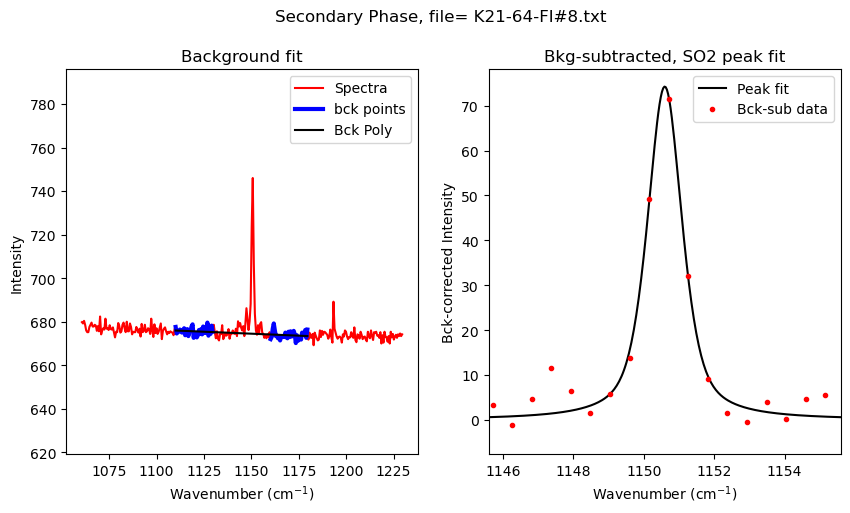

In [ ]:
files_to_fit=filenames_SO2
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_SO2 = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=plot_figure)
 
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)

### Plot peak areas and peak heights

Text(0, 0.5, 'Peak Height SO2')

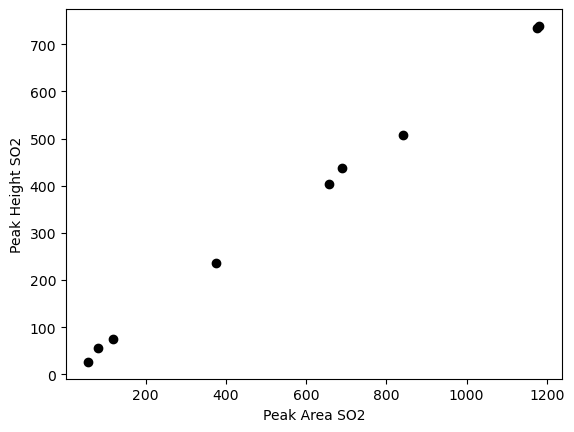

In [ ]:
plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
        df_Merge_SO2['Peak_Height_SO2'], 'ok')
plt.xlabel('Peak Area SO2')
plt.ylabel('Peak Height SO2')
# plt.yscale('log')
# plt.xscale('log')

### Save this to excel

In [36]:
df_Merge_SO2.to_excel('SO2_Peak_fits.xlsx', index=False)

## Now do the same to ID any carbonate peaks

g15-mi1_01.txt
g15-mi1_01.txt
g15-mi1_02.txt
g15-mi1incl_01.txt
g36-mi1_01.txt
g36-mi1_02.txt
g36-mi1_03.txt
g36-mi1_04.txt
g36-mi1_05.txt
g36-mi1_06.txt
g45-mi1bub1_01.txt
g45-mi1bub1_02.txt
g45-mi1bub1_03.txt
g45-mi1bub1_04.txt
g45-mi1bub1_05.txt
g45-mi1bub2_01.txt
g45-mi1bub2_02.txt
g45-mi1bub2_03.txt
g45-mi1bub2_04.txt
g45-mi1bub2_05.txt
g45-mi2_01.txt
g45-mi2_02.txt
g45-mi2_03.txt
g45-mi2_04.txt
g45-mi2_05.txt
g47-mi1-bub1_01.txt
g47-mi1-bub1_02.txt
g47-mi1-bub1_03.txt
g47-mi1-bub1_04.txt
g47-mi1-bub1_05.txt
g47-mi1-bub2_01.txt
g47-mi1-bub2_02.txt
g47-mi1-bub2_03.txt


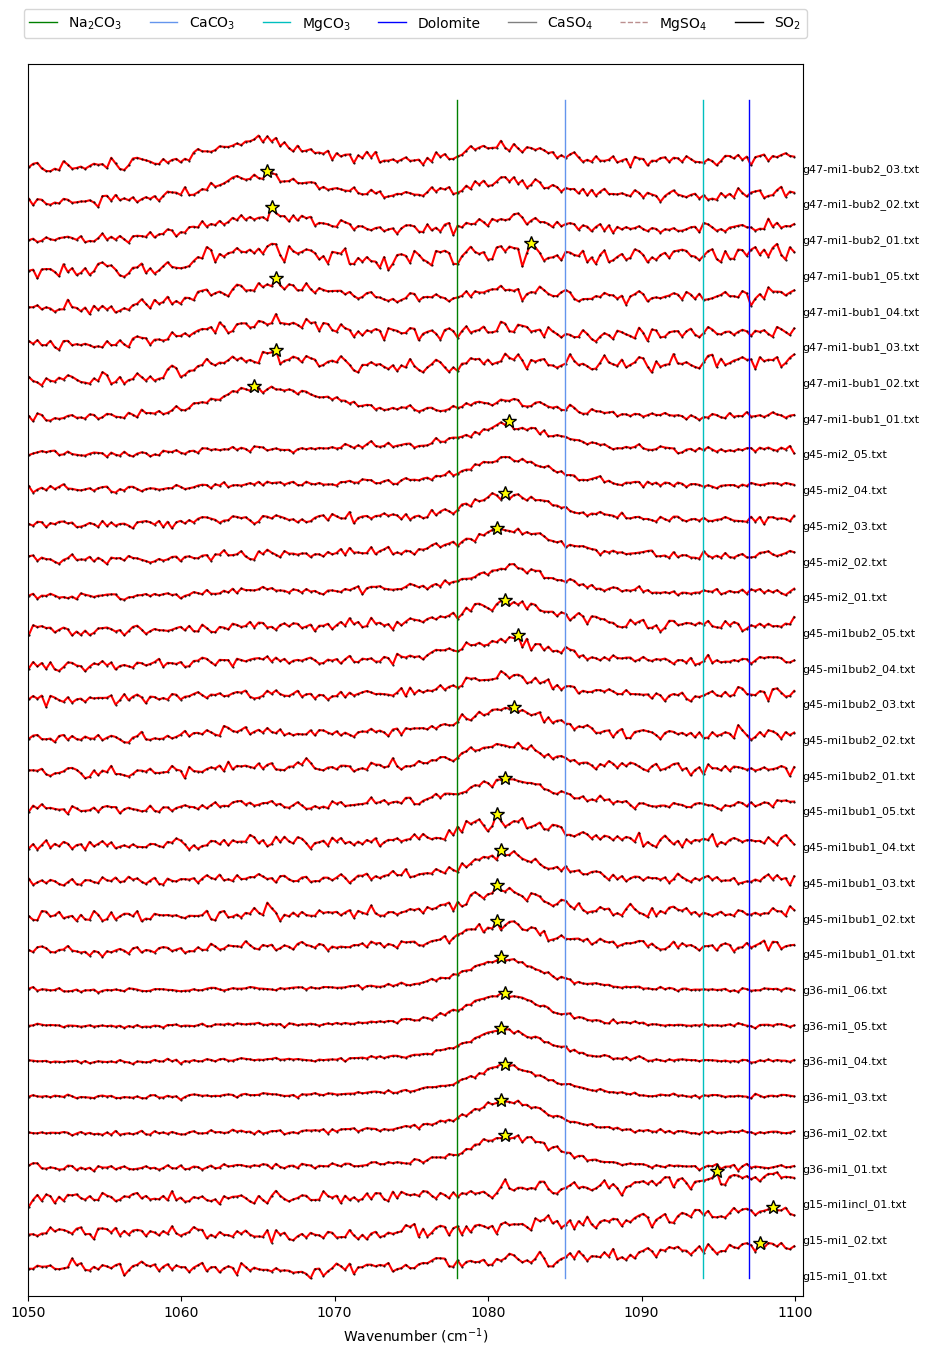

In [10]:
## Using Sigma method
Carb_peaks_sigma, x_data_sigma, y_data_sigma, fig_sigma=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
filetype=filetype,  sigma_filter=True, sigma=1, 
xlim=[1050, 1100], yscale=0.5)

## Using scipy find peaks methods

generic_peak_config(name='generic', lower_bck=(1060, 1065), upper_bck=(1120, 1130), x_range_bck=10, N_poly_carb_bck=1, amplitude=1000, cent_generic=1090, outlier_sigma=12, N_peaks=1, distance=10, prominence=30, width=1, threshold=1, height=10, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)
g15-mi1_01.txt
g15-mi1_01.txt
g15-mi1_02.txt
g15-mi1incl_01.txt
g36-mi1_01.txt
g36-mi1_02.txt
g36-mi1_03.txt
g36-mi1_04.txt
g36-mi1_05.txt
g36-mi1_06.txt
g45-mi1bub1_01.txt
g45-mi1bub1_02.txt
g45-mi1bub1_03.txt
g45-mi1bub1_04.txt
g45-mi1bub1_05.txt
g45-mi1bub2_01.txt
g45-mi1bub2_02.txt
g45-mi1bub2_03.txt
g45-mi1bub2_04.txt
g45-mi1bub2_05.txt
g45-mi2_01.txt
g45-mi2_02.txt
g45-mi2_03.txt
g45-mi2_04.txt
g45-mi2_05.txt
g47-mi1-bub1_01.txt
g47-mi1-bub1_02.txt
g47-mi1-bub1_03.txt
g47-mi1-bub1_04.txt
g47-mi1-bub1_05.txt
g47-mi1-bub2_01.txt
g47-mi1-bub2_02.txt
g47-mi1-bub2_03.txt


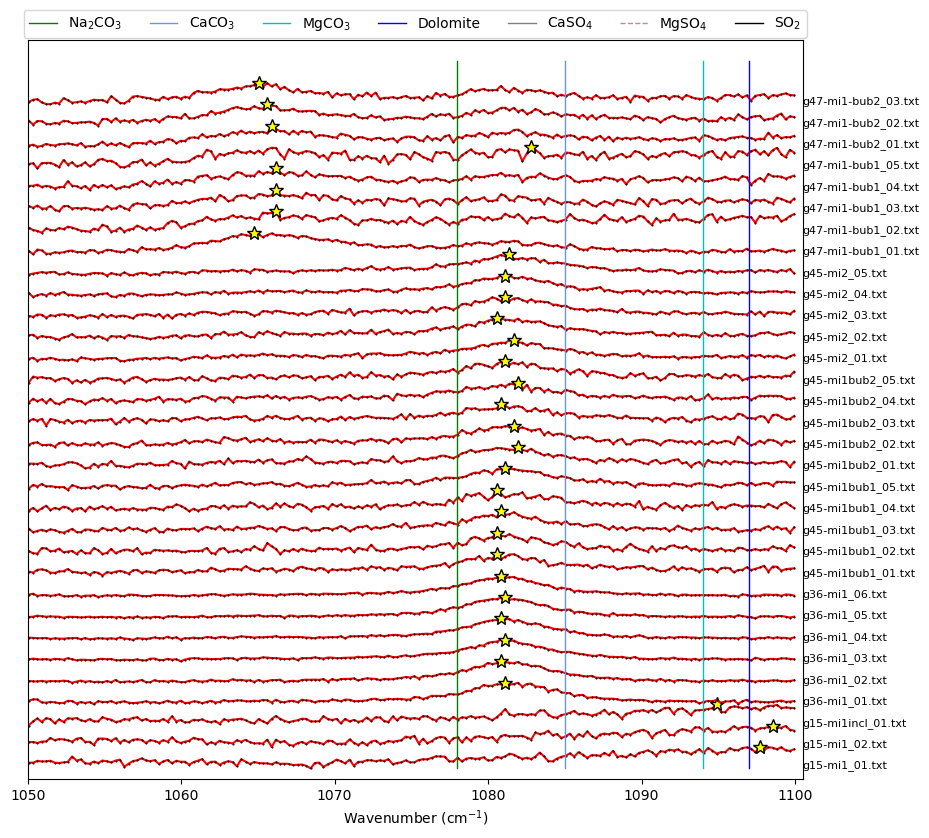

In [11]:
config_sec_Carb_scipy=pf.generic_peak_config(N_peaks=1, 
            prominence=30, height=10,
            width=1, threshold=1)
print(config_sec_SO2_scipy)

Carb_peaks_scipy, x_data_scipy, y_data_scipy, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=filetype, config=config_sec_Carb_scipy, find_peaks_filter=True,  
xlim=[1050, 1100], yscale=0.3)


In [12]:
File_df=pd.DataFrame(data={'filename': Diad_Files})
Carb_peaks=Carb_peaks_scipy
filenames_Carb=list(File_df['filename'].loc[(
    (Carb_peaks['pos'].between(1080, 1100))
    &
    (Carb_peaks['prom']>10)
    )])
filename=filenames_Carb[0]
filename

IndexError: list index out of range

### Fit one to tweak parameters

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1160, 1180], x_range_bck=5, N_poly_carb_bck=1, amplitude=1000, cent_generic=1150, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)


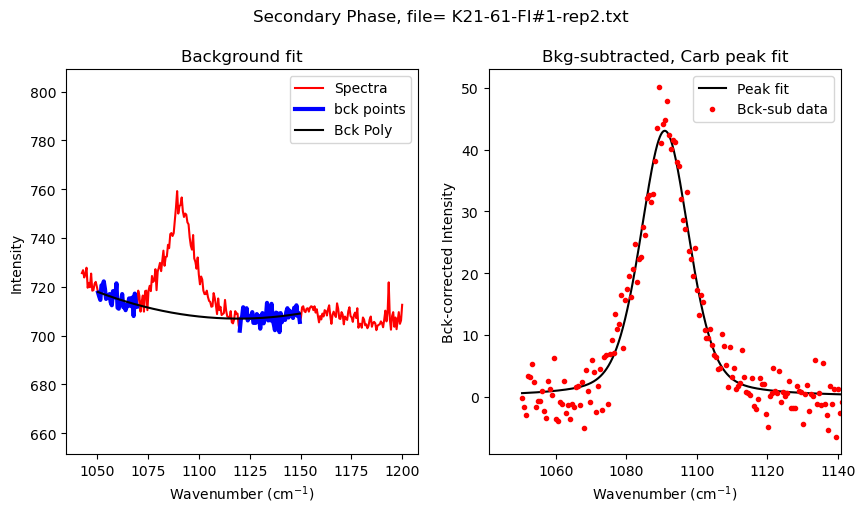

In [28]:
Carb_peak_config=pf.generic_peak_config(name='Carb', lower_bck=[1050, 1070],
upper_bck=[1120, 1150], cent_generic=1090, x_range_bck=50, N_poly_carb_bck=2)
print(SO2_peak_config)

Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=True)

### Loop over all carbonate files

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.84it/s]


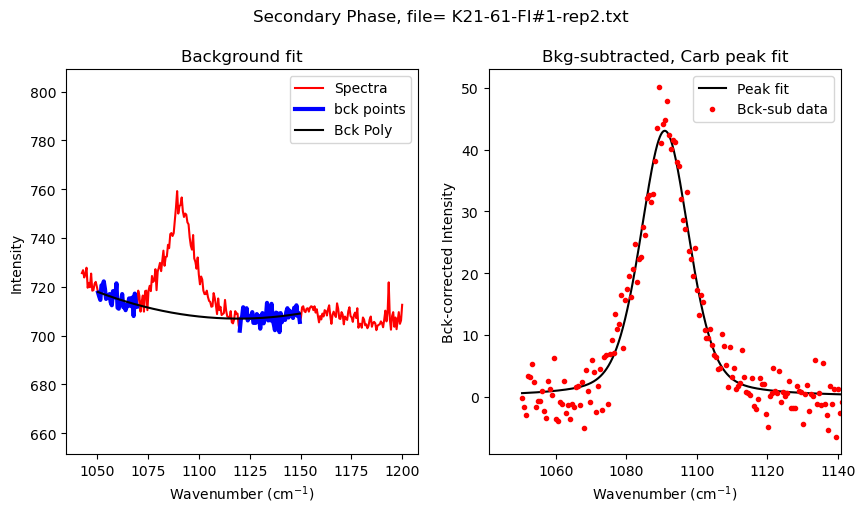

In [31]:
files_to_fit=filenames_Carb
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_Carb = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=filetype,
model_name='PseudoVoigtModel',
 plot_figure=plot_figure)
 
    df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)

Text(0, 0.5, 'Peak Height SO2')

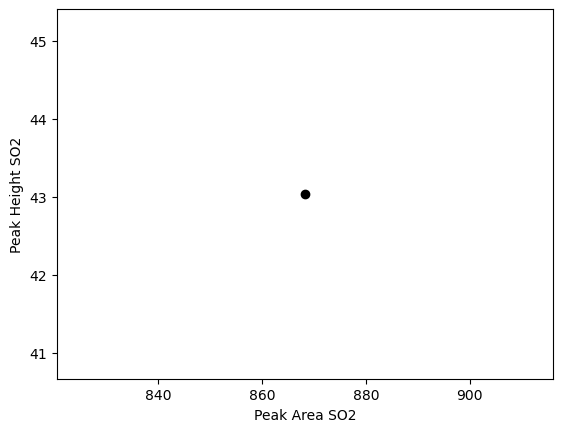

In [32]:
plt.plot(df_Merge_Carb['Peak_Area_Carb'], 
        df_Merge_Carb['Peak_Height_Carb'], 'ok')
plt.xlabel('Peak Area SO2')
plt.ylabel('Peak Height SO2')
# plt.yscale('log')
# plt.xscale('log')

## Save to excel

In [37]:
df_Merge_Carb.to_excel('Carb_Peak_fits.xlsx', index=False )